<a href="https://colab.research.google.com/github/obeabi/SdsOctober2020Challenge/blob/main/Main_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
# SDS October Challenge #2 - Used Car Prices
## 2021-01-02

This month you have been hired by a new car trader company to help sell its used cars. You will be analyzing used cars from multiple manufacturers and of different models. Your job is to help the car trader company determine the price of its used cars.

## Step 1: Data Preprocessing 

In [ ]:
# Download packages
!pip install category_encoders

In [ ]:
# Importing the libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import  zscore
import category_encoders as ce
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)

Libraries installed successfully!


In [ ]:
# Importing the training dataset

df_train = pd.read_csv('Train.csv', engine= 'python', encoding= 'latin1')


df_train.head()

,Unnamed: 0,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,0,gasoline,1.6,hatchback,0,owned,front,1,0,0,0,0,0,0,0,0,0,7,4250.0
1,1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,0,gasoline,3.3,minivan,0,owned,front,0,1,0,0,0,0,0,0,0,0,133,4000.0
2,2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,0,diesel,1.8,minivan,0,owned,front,0,0,0,1,0,0,1,1,1,1,0,10900.0
3,3,Mazda,6,mechanical,other,225522,2008,gasoline,0,gasoline,1.8,universal,0,owned,front,0,1,1,0,0,1,0,0,1,1,20,6999.0
4,4,Audi,80,mechanical,black,370000,1991,gasoline,0,gasoline,1.8,sedan,0,owned,front,0,0,0,0,0,0,0,0,0,1,160,1600.0


In [ ]:
# drop first column
df_train.drop('Unnamed: 0', axis = 1, inplace = True)

df_train.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,0,gasoline,1.6,hatchback,0,owned,front,1,0,0,0,0,0,0,0,0,0,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,0,gasoline,3.3,minivan,0,owned,front,0,1,0,0,0,0,0,0,0,0,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,0,diesel,1.8,minivan,0,owned,front,0,0,0,1,0,0,1,1,1,1,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,0,gasoline,1.8,universal,0,owned,front,0,1,1,0,0,1,0,0,1,1,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,0,gasoline,1.8,sedan,0,owned,front,0,0,0,0,0,0,0,0,0,1,160,1600.0


In [ ]:
# Importing the test dataset

df_test = pd.read_csv('Test.csv', engine= 'python', encoding= 'latin1')

df_test.head()

,Unnamed: 0,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,0,Renault,Megane,mechanical,blue,360000,1997,gasoline,0,gasoline,1.6,coupe,0,owned,front,0,1,0,0,0,0,0,1,0,1,114
1,1,Peugeot,206,mechanical,silver,267000,1999,gasoline,0,gasoline,1.4,hatchback,0,owned,front,0,0,0,0,0,0,0,0,0,1,67
2,2,Volkswagen,Sharan,mechanical,blue,172000,2000,gasoline,0,gasoline,2.0,minivan,0,owned,front,1,0,0,0,0,0,0,0,0,0,50
3,3,Volvo,XC60,mechanical,white,230000,2009,diesel,0,diesel,2.4,universal,0,owned,front,0,1,1,1,0,1,1,1,1,1,79
4,4,Mazda,3,mechanical,silver,206000,2007,gasoline,0,gasoline,1.6,sedan,0,owned,front,0,1,0,1,0,1,0,0,0,0,74


In [ ]:
# drop first column
df_test.drop('Unnamed: 0', axis = 1, inplace = True)

df_test.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Renault,Megane,mechanical,blue,360000,1997,gasoline,0,gasoline,1.6,coupe,0,owned,front,0,1,0,0,0,0,0,1,0,1,114
1,Peugeot,206,mechanical,silver,267000,1999,gasoline,0,gasoline,1.4,hatchback,0,owned,front,0,0,0,0,0,0,0,0,0,1,67
2,Volkswagen,Sharan,mechanical,blue,172000,2000,gasoline,0,gasoline,2.0,minivan,0,owned,front,1,0,0,0,0,0,0,0,0,0,50
3,Volvo,XC60,mechanical,white,230000,2009,diesel,0,diesel,2.4,universal,0,owned,front,0,1,1,1,0,1,1,1,1,1,79
4,Mazda,3,mechanical,silver,206000,2007,gasoline,0,gasoline,1.6,sedan,0,owned,front,0,1,0,1,0,1,0,0,0,0,74


In [ ]:
# priniting the details about the train dataset

print("\nEDA on Training Set\n")
print("#"*30)

print("\nFeatures/Columns : \n", df_train.columns)
print("\n\nNumber of Features/Columns : ", len(df_train.columns))
print("\nNumber of Rows : ",len(df_train))
print("\n\nData Types :\n", df_train.dtypes)

print("\n Contains NaN/Empty cells : ", df_train.isnull().values.any())

print("\n Total empty cells by column :\n", df_train.isnull().sum(), "\n\n")

print("\n Perecentage of missing values in train datframe is: \n", str(100*(df_train.isnull().sum().sum()/len(df_train)))+'%')



EDA on Training Set

##############################

Features/Columns : 
 Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'duration_listed', 'price_usd'],
      dtype='object')


Number of Features/Columns :  26

Number of Rows :  30824


Data Types :
 manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas         int64
engine_type           object
engine_capacity      float64
body_type             object
has_warranty           int64
state                 object
drivetrain            object
fe

In [ ]:
# priniting the details about the test dataset

print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)


print("\nFeatures/Columns : \n",df_test.columns)
print("\n\nNumber of Features/Columns : ",len(df_test.columns))
print("\nNumber of Rows : ",len(df_test))
print("\n\nData Types :\n", df_test.dtypes)
print("\n Contains NaN/Empty cells : ", df_test.isnull().values.any())
print("\n Total empty cells by column :\n", df_test.isnull().sum())
print("\n Perecentage of missing values in test datframe is: \n", str(100*(df_test.isnull().sum().sum()/len(df_test)))+'%')

##############################

EDA on Test Set

##############################

Features/Columns : 
 Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'duration_listed'],
      dtype='object')


Number of Features/Columns :  25

Number of Rows :  7707


Data Types :
 manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas         int64
engine_type           object
engine_capacity      float64
body_type             object
has_warranty           int64
state                 object
drivetrain        

In [ ]:
# Extract numerical columns from train dataframe
numerical_cols = [cname for cname in df_train.columns if
                df_train[cname].dtype in ['int64', 'float64']]

num_train= df_train[numerical_cols].copy()

num_train.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,245000,2006,0,1.6,0,1,0,0,0,0,0,0,0,0,0,7,4250.0
1,265542,2002,0,3.3,0,0,1,0,0,0,0,0,0,0,0,133,4000.0
2,168000,2009,0,1.8,0,0,0,0,1,0,0,1,1,1,1,0,10900.0
3,225522,2008,0,1.8,0,0,1,1,0,0,1,0,0,1,1,20,6999.0
4,370000,1991,0,1.8,0,0,0,0,0,0,0,0,0,0,1,160,1600.0


In [ ]:
# pRINT TEST SET

num_test = df_test[numerical_cols[:-1]]
num_test.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,360000,1997,0,1.6,0,0,1,0,0,0,0,0,1,0,1,114
1,267000,1999,0,1.4,0,0,0,0,0,0,0,0,0,0,1,67
2,172000,2000,0,2.0,0,1,0,0,0,0,0,0,0,0,0,50
3,230000,2009,0,2.4,0,0,1,1,1,0,1,1,1,1,1,79
4,206000,2007,0,1.6,0,0,1,0,1,0,1,0,0,0,0,74


In [ ]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

## Building  first model with only numericals columns

In [ ]:
bool_cols = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']
trainset_num = num_train.drop(bool_cols, axis = 1)

trainset_num.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,duration_listed,price_usd
0,245000,2006,0,1.6,0,7,4250.0
1,265542,2002,0,3.3,0,133,4000.0
2,168000,2009,0,1.8,0,0,10900.0
3,225522,2008,0,1.8,0,20,6999.0
4,370000,1991,0,1.8,0,160,1600.0


In [ ]:
pure_num_features = trainset_num.columns

testset_num = num_test[pure_num_features[:-1]]

testset_num.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,duration_listed
0,360000,1997,0,1.6,0,114
1,267000,1999,0,1.4,0,67
2,172000,2000,0,2.0,0,50
3,230000,2009,0,2.4,0,79
4,206000,2007,0,1.6,0,74


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

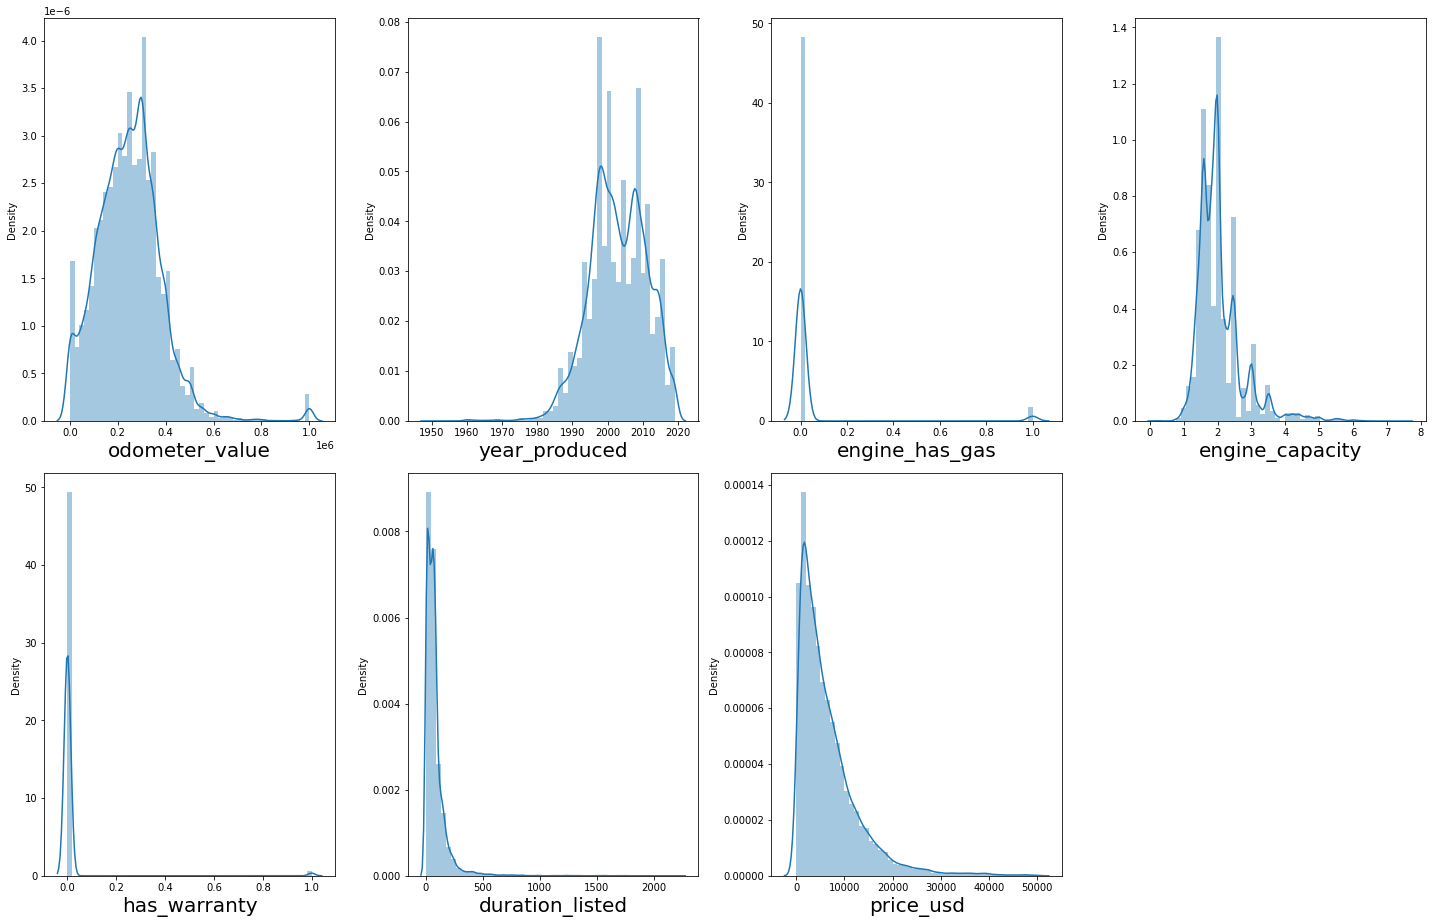

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in trainset_num:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(trainset_num[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

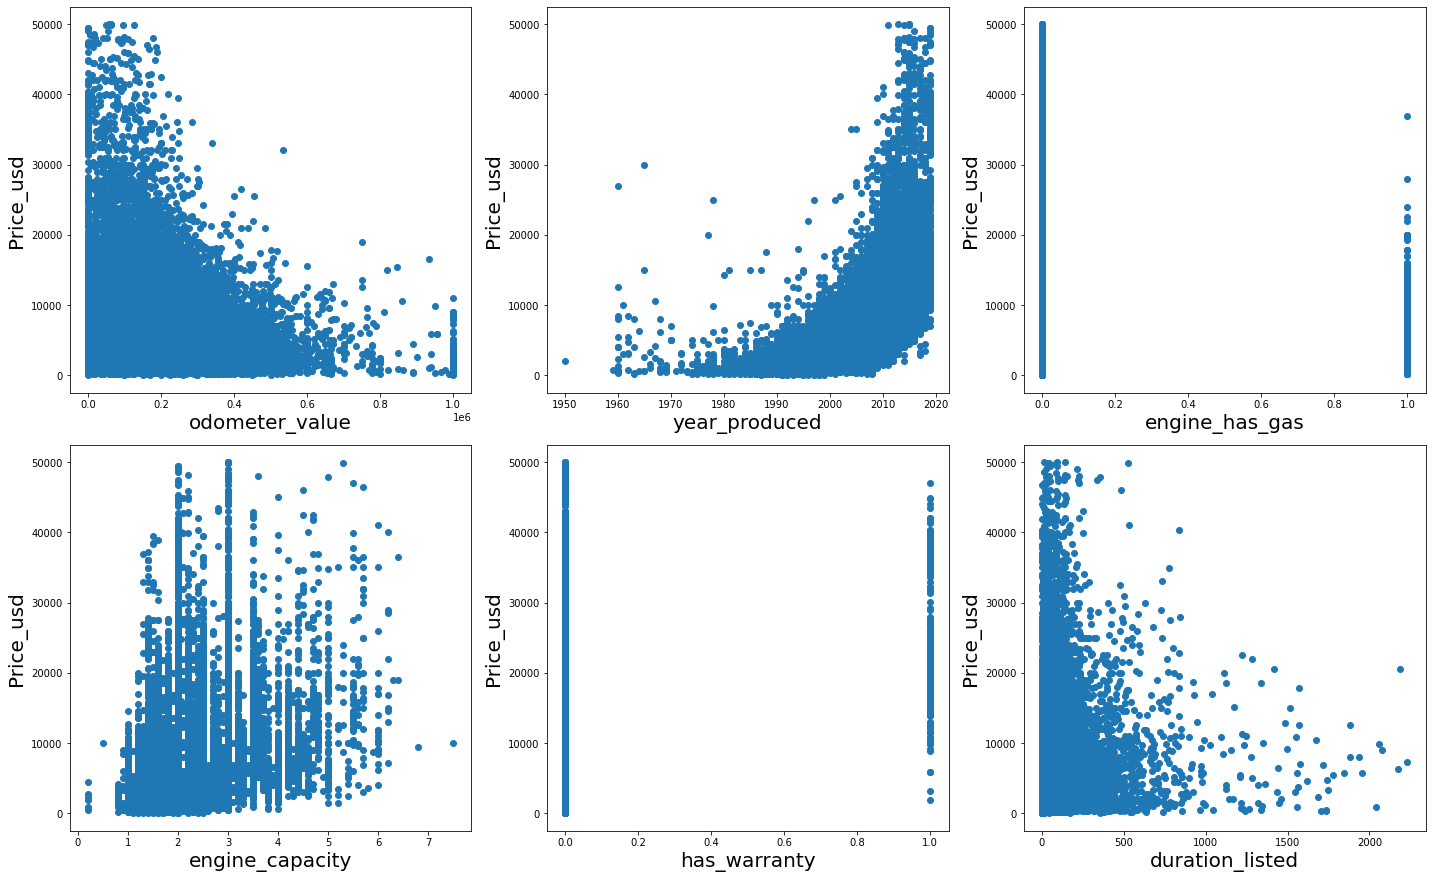

In [ ]:
# Viusalize realtionship between indepednet and dependent variable
y = trainset_num['price_usd']
X = trainset_num.drop(columns = ['price_usd'])

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price_usd',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Checking for colinearity
y = trainset_num.iloc[:,-1].values
y = y.reshape(len(y),1)
y.shape
scaler =StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

,VIF,Features
0,1.349730,odometer_value
1,1.352214,year_produced
2,1.012081,engine_has_gas
3,1.030905,engine_capacity
4,1.065159,has_warranty
5,1.010475,duration_listed


In [ ]:
# split train set into feature and target variables
x_train,x_valid,y_train,y_valid = train_test_split(X_scaled,y_scaled,test_size = 0.2,random_state=35)


In [ ]:
# print X_train
print(x_train)

[[ 5.53333137 -1.73192784 -0.18963531  0.51805338 -0.10977147 -0.47351969]
 [-0.13850424 -0.24099552  5.2732795   0.21840001 -0.10977147  0.77808812]
 [-0.0869421  -0.11675116 -0.18963531 -0.38090673 -0.10977147  1.19529072]
 ...
 [-0.42577903  1.49842551 -0.18963531 -0.6805601  -0.10977147 -0.5445329 ]
 [-0.35948485  0.50447064 -0.18963531 -0.23108005 -0.10977147 -0.69543597]
 [-1.34653157 -2.22890528 -0.18963531 -1.42969353 -0.10977147 -0.45576639]]


In [ ]:
print(y_train)

[[-0.92490599]
 [-0.56620969]
 [-0.3790638 ]
 ...
 [ 1.2584628 ]
 [-0.1061427 ]
 [-1.00288345]]


In [ ]:
# Build linear regreesion model
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Check accuracy on train set
regression.score(x_train,y_train)

0.6257393904719986

In [ ]:
# check adjusted r2 on train set
adj_r2(x_train,y_train)

0.6256482999455841

In [ ]:
# Check accuracy on validation set
regression.score(x_valid,y_valid)

0.6155227672326482

In [ ]:
# check adjusted r2 on validation set
adj_r2(x_valid,y_valid)

0.615148154794096

In [ ]:
# saving the model to the local file system
filename = 'firstLR_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

## Lasso Regression

In [ ]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

4.506675649497208e-06

In [ ]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=4.506675649497208e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Examine r2 score on train set
lasso_reg.score(x_train, y_train)

0.6257393903749576

In [ ]:
# Examine r2 score on validation set
lasso_reg.score(x_valid, y_valid)

0.6155226474395943

### Ridge Regression

In [ ]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([3.73034864, 5.24970442, 7.50595023, 3.33507466, 9.24158767,
       8.62318547, 0.48690296, 2.53642524, 4.46135513, 1.04627889,
       3.48475989, 7.40097526, 6.80514481, 6.22384429, 7.10528403,
       2.04923687, 3.41698115, 6.76242482, 8.79234763, 5.43678054,
       2.82699651, 0.30235258, 7.10336829, 0.07884104, 3.7267907 ,
       5.30537215, 9.22111462, 0.89494545, 4.05942322, 0.243132  ,
       3.42610984, 6.22231059, 2.79067948, 2.0974995 , 1.15703233,
       5.77140244, 6.95270006, 6.71957141, 9.48861021, 0.02703214,
       6.47196654, 6.00392237, 5.8873961 , 9.6277032 , 0.16871673,
       6.96482431, 8.1367865 , 5.09807197, 3.3396487 , 7.90840163]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [ ]:
ridgecv.alpha_

0.027032138935026984

In [ ]:
# Now fit model with best alpha
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.027032138935026984, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [ ]:
# Test model performance
ridge_model.score(x_valid, y_valid)

0.6155227625733142

## Elastic net

In [ ]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [ ]:
# # l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
print(elasticCV.alpha_)
print(elasticCV.l1_ratio)

0.0014141980382288098
0.5


In [ ]:
# Fit elastic net regressor
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0014141980382288098, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [ ]:
# Examine r2s core
elasticnet_reg.score(x_valid, y_valid)

0.6155006062418662

## Polynomial Regression

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)  #trying to create a 3 degree polynomial equation. It simply squares the x as shown in the output
X_poly_train = poly_reg.fit_transform(x_train)
X_poly_valid = poly_reg.transform(x_valid)
print(X_poly_train)


[[ 1.00000000e+00  5.53333137e+00 -1.73192784e+00 ... -5.70580574e-03
  -2.46130567e-02 -1.06173008e-01]
 [ 1.00000000e+00 -1.38504241e-01 -2.40995524e-01 ...  9.37578679e-03
  -6.64579643e-02  4.71070974e-01]
 [ 1.00000000e+00 -8.69420987e-02 -1.16751164e-01 ...  1.44029843e-02
  -1.56832680e-01  1.70773563e+00]
 ...
 [ 1.00000000e+00 -4.25779031e-01  1.49842551e+00 ... -6.56149893e-03
  -3.25490048e-02 -1.61462757e-01]
 [ 1.00000000e+00 -3.59484849e-01  5.04470635e-01 ... -8.37984697e-03
  -5.30889046e-02 -3.36334517e-01]
 [ 1.00000000e+00 -1.34653157e+00 -2.22890528e+00 ... -5.49188244e-03
  -2.28020584e-02 -9.46731602e-02]]


In [ ]:
# Train polynomial regression model or order = 3
# doing the actual polynomial Regression
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Examine r2 score on train set
lin_reg_2.score(X_poly_train, y_train)

0.7989489089885956

In [ ]:
# Examine r2 score on validation set
lin_reg_2.score(X_poly_valid, y_valid)

0.798878701595416

In [ ]:
# Training the Linear Regression model on the whole dataset

test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3,4]



for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    X_poly_train = poly_reg.fit_transform(x_train)
    X_poly_valid = poly_reg.fit_transform(x_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(X_poly_train, y_train) 
    train_error.append(regressor.score(X_poly_train, y_train))
    test_error.append(regressor.score(X_poly_valid, y_valid))

The order of the polynomial is 1
The order of the polynomial is 2
The order of the polynomial is 3
The order of the polynomial is 4


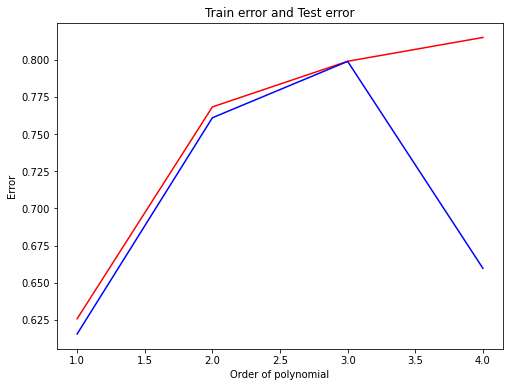

In [ ]:
# Visualising the Linear Regression results
plt.plot(poly_orders, train_error, color = 'red')
plt.plot(poly_orders, test_error, color = 'blue')
plt.title('Train error and Test error')
plt.xlabel('Order of polynomial')
plt.ylabel('Error')
plt.show()